Here, I'm looking at the testosterone results in more detail because it appears that there is a negative genetic correlation between pre-meno and post-meno women - and this doesn't quite make sense?

In [1]:
require('tidyverse')
require('rstan')
require('data.table')

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.1     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: rstan
Loading required package: StanHeaders
rstan (Version 2.17.3, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Attaching package: ‘rstan’

The following object is masked from ‘package:tidyr’:

    extract

Loading required package: data.table

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, fir

In [10]:
t_phe <- read_tsv("/oak/stanford/groups/mrivas/projects/biomarkers/covariate_corrected/outputExtendedNoTDIreduced/phenotypes/residual/Testosterone.phe")
meno_phe <- read_tsv("../../phe_extraction//menopause_phe_table.txt")
meno_plus_t <- full_join(select(t_phe, -FID), meno_phe)
alt_t <- read.table("../../phefiles/30850.phe", header=FALSE)
colnames(alt_t) <- c("FID", "IID", "raw_T")
meno_t2 <- full_join(select(alt_t, -FID), meno_plus_t)
meno_t3 <- meno_t2 %>% filter(meno.label %in% c("pre", "post", "male")) %>% select(raw_T, Testosterone, meno.label)
meno_t3 %>% head()
meno_t3 %>% filter(!is.na(Testosterone)) %>% group_by(meno.label) %>% count()

Parsed with column specification:
cols(
  FID = col_integer(),
  IID = col_integer(),
  Testosterone = col_double()
)
Warning message:
“2 parsing failures.
row # A tibble: 2 x 5 col      row col   expected               actual file                               expected    <int> <chr> <chr>                  <chr>  <chr>                              actual 1 137665 FID   no trailing characters e+06   '/oak/stanford/groups/mrivas/proj… file 2 137665 IID   no trailing characters e+06   '/oak/stanford/groups/mrivas/proj…
”Parsed with column specification:
cols(
  IID = col_integer(),
  sex = col_integer(),
  age_v0 = col_integer(),
  visit = col_integer(),
  preg = col_integer(),
  pill = col_integer(),
  hrt = col_integer(),
  ooph = col_integer(),
  hyster = col_integer(),
  meno = col_integer(),
  hyster2 = col_integer(),
  meno.age = col_integer(),
  years.post = col_integer(),
  surgical.meno = col_integer(),
  meno.label = col_character()
)
Joining, by = "IID"
Joining, by = "IID"


raw_T,Testosterone,meno.label
11.419,-0.08475215,male
11.395,0.04464971,male
12.911,0.09251554,male
8.204,-0.48137181,male
0.675,-0.47587454,pre
0.675,-0.47587454,pre


meno.label,n
male,209228
post,110110
pre,49364


Warning message:
“Removed 52516 rows containing non-finite values (stat_density).”

Warning message:
“Removed 38213 rows containing non-finite values (stat_density).”

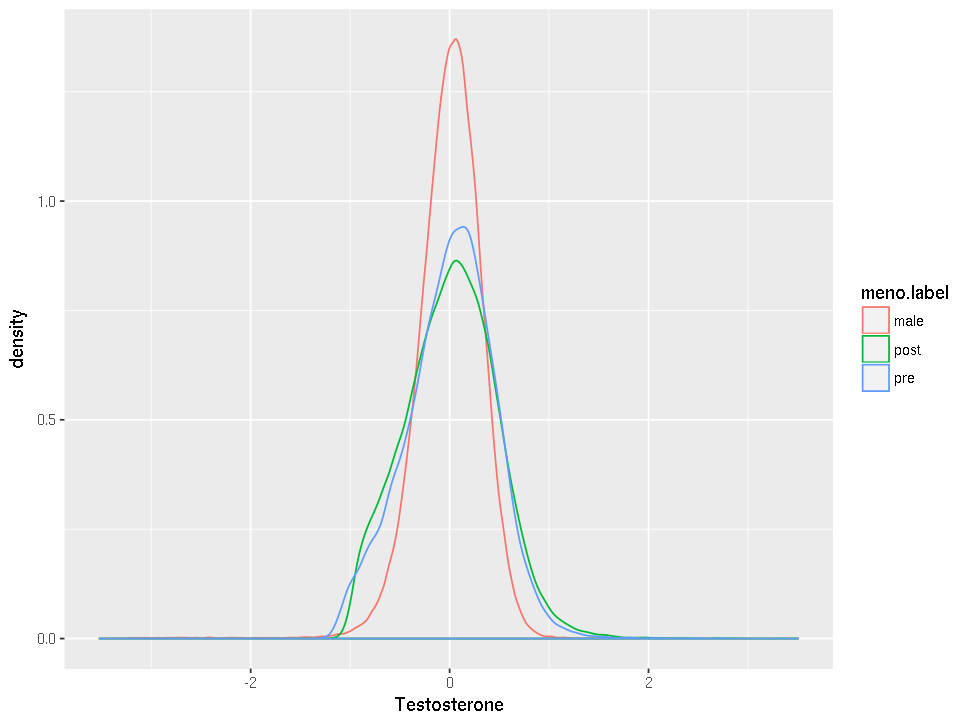

Warning message:
“Removed 49416 rows containing non-finite values (stat_density).”

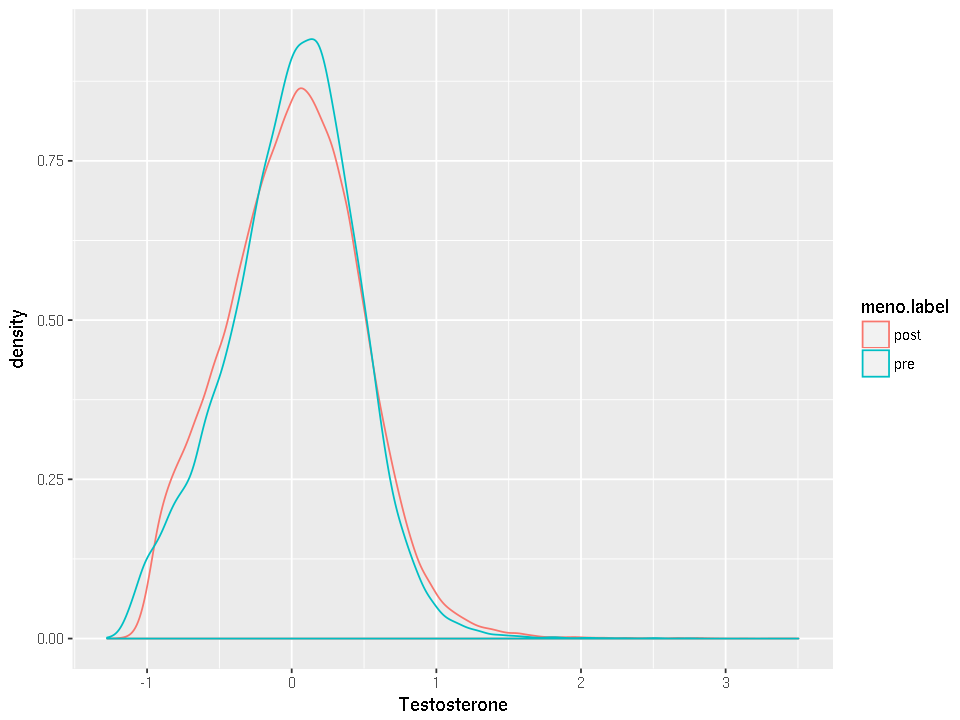

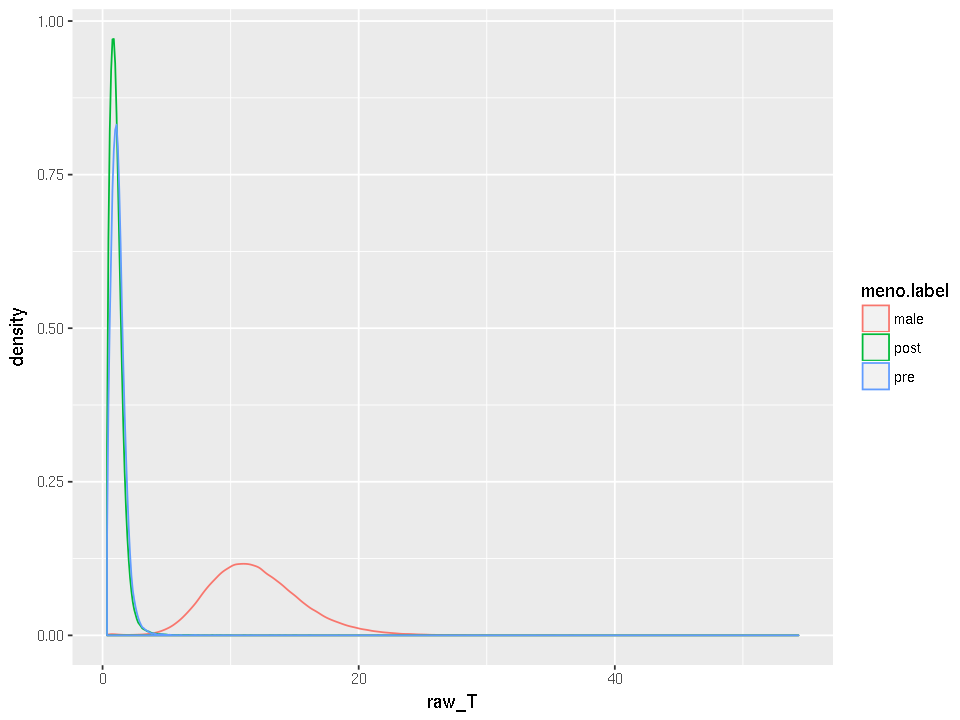

In [11]:
# compare densities
ggplot(meno_t3, aes(x=Testosterone, color=meno.label, group=meno.label))+geom_density()
ggplot(filter(meno_t3, meno.label!="male"), aes(x=Testosterone, color=meno.label, group=meno.label))+geom_density()
ggplot(meno_t3, aes(x=raw_T, color=meno.label, group=meno.label))+geom_density()

Inference for Stan model: model1_no_loglik.
4 chains, each with iter=600; warmup=200; thin=1; 
post-warmup draws per chain=400, total post-warmup draws=1600.

                  mean se_mean      sd     2.5%      50%    97.5% n_eff    Rhat
Omegacor[1,1]  1.00000 0.00000 0.00000  1.00000  1.00000  1.00000  1600     NaN
Omegacor[1,2] -0.87316 0.00019 0.00584 -0.88421 -0.87315 -0.86177   897 1.00375
Omegacor[1,3]  0.01828 0.00058 0.02332 -0.02778  0.01766  0.06293  1600 0.99787
Omegacor[2,1] -0.87316 0.00019 0.00584 -0.88421 -0.87315 -0.86177   897 1.00375
Omegacor[2,2]  1.00000 0.00000 0.00000  1.00000  1.00000  1.00000  1600     NaN
Omegacor[2,3]  0.03453 0.00059 0.02371 -0.01120  0.03488  0.08084  1600 1.00008
Omegacor[3,1]  0.01828 0.00058 0.02332 -0.02778  0.01766  0.06293  1600 0.99787
Omegacor[3,2]  0.03453 0.00059 0.02371 -0.01120  0.03488  0.08084  1600 1.00008
Omegacor[3,3]  1.00000 0.00000 0.00000  1.00000  1.00000  1.00000  1600 0.99750
pi[1]          0.90287 0.00010 0.00263  0

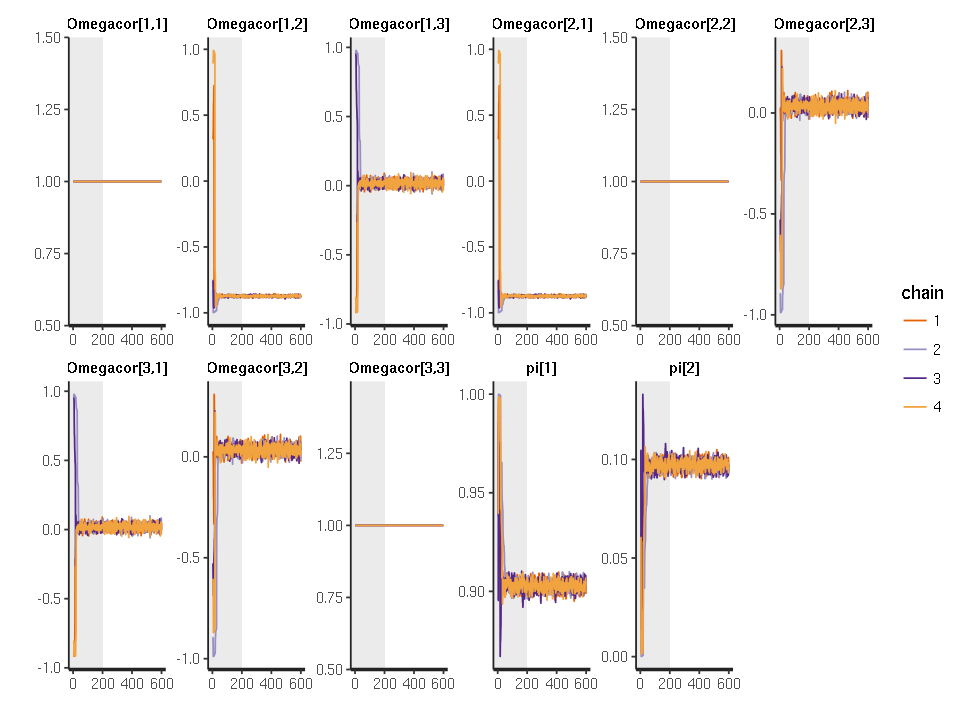

In [12]:
# look at the fit

load( "../../data/1009/f_Testosterone.RData")

print(fit1, pars=c("Omegacor", "pi"), probs=c(0.025, 0.5, 0.975), digits_summary=5)
options(repr.plot.width=8, repr.plot.height=6)
traceplot(fit1, pars = c("Omegacor", "pi"), inc_warmup = TRUE, nrow = 2)

In [13]:
ndim <- 3
fit_summ_R <- summary(fit1, pars=c("Omegacor"), probs=c(0.05, 0.95))
rg <- matrix(fit_summ_R$summary[,c("mean")], ndim, ndim)
rg
rg[upper.tri(rg, diag=FALSE)]

1.00000000,-0.87316051,0.01828301
-0.87316051,1.00000000,0.03453227
0.01828301,0.03453227,1.00000000


[1] -0.87316051  0.01828301  0.03453227

In [14]:
# how does testosterone look in terms of genetic correlation, 

## what do the SNPs look like? 



In [17]:
load("../../data/biomarker/dat_Testosterone.RData") # this is the 2dim one for m1
dat_2d <- dat
load("../../data/biomarker/m2/dat_Testosterone.RData") # 2dim one m2
dat_2d_m2 <- dat
load("../../data/1009/dat_Testosterone.RData") # this is the 3dim one
str(dat, 2)
dat_3d <- dat

length(dat_2d$snp)
length(dat_2d_m2$snp)
length(dat_3d$snp)
length(intersect(dat_2d$snp, dat_2d_m2$snp)) # complete overlap - yay
length(intersect(dat_2d$snp, dat_3d$snp))  # so it's like one third of the SNPs now
length(intersect(dat_2d_m2$snp, dat_3d$snp)) # so it's like one third of the SNPs now


List of 3
 $ dat:List of 5
  ..$ N : int 171153
  ..$ M : int 3
  ..$ B : num [1:171153, 1:3] -0.01715 0.10122 -0.04087 0.00273 -0.06491 ...
  ..$ SE: num [1:171153, 1:3] 5.21e-05 3.95e-03 1.52e-03 4.35e-05 1.93e-04 ...
  ..$ K : num 2
 $ snp: Named chr [1:171153] "rs11240779" "rs59771807" "rs116452738" "rs4970382" ...
  ..- attr(*, "names")= chr [1:171153] "rs11240779" "rs59771807" "rs116452738" "rs4970382" ...
 $ chr: Named chr [1:171153] "1" "1" "1" "1" ...
  ..- attr(*, "names")= chr [1:171153] "1" "1" "1" "1" ...


[1] 328694

[1] 328694

[1] 171153

[1] 328694

[1] 127756

[1] 127756

In [16]:
length(intersect(snps.to.keep$V1, dat_2d$snp)) # 134013... different LD filter

ERROR: Error in intersect(snps.to.keep$V1, dat_2d$snp): object 'snps.to.keep' not found


In [ ]:
load("../../data/1009/dat_whr.RData") # whr result
dat_whr <- dat
length(dat_whr$snp)
length(intersect(dat_2d$snp, dat_whr$snp))  
length(intersect(dat_3d$snp, dat_whr$snp))
length(intersect(snps.to.keep$V1, dat_whr$snp))

In [ ]:
snp_list <- dat_3d$snp
betas <- data.frame(dat_3d$dat$B)
ses <- data.frame(dat_3d$dat$SE)
colnames(ses) <- c("SE_pre", "SE_post", "SE_men")

colnames(betas) <- c("B_pre", "B_post", "B_men")
b_df <- cbind(betas, ses) 
b_df$snp <- snp_list
head(b_df)


In [ ]:
# read in the testosterone variants

t_snps <- fread("../../data/biomarker/m2/snp_table_Testosterone.txt", sep=" ", header=TRUE, data.table=FALSE)
t_snps %>% head()

In [ ]:
f_snps <- t_snps %>% filter(category==2) 
m_snps <- t_snps %>% filter(category==3)


In [ ]:
dim(f_snps)
dim(m_snps)
intersect(f_snps$SNP, b_df$snp)
setdiff(f_snps$SNP, b_df$snp)
length(intersect(m_snps$SNP, b_df$snp))
length(setdiff(m_snps$SNP, b_df$snp))
length(snp_list)




I am confused - the SNPs included are a much smaller list?? 

Two things to look into:
(1) what is actually going on with the SNPs that *are* included (grab their pvals)
(2) why do we have this inconsistency

Possibilities for part II:
- when we filter, something different happens?
- we are filtering differently? make sure I know what is going on here

In [2]:
gwas.folder <- "../../gwas_age_sex/"
trait <- "Testosterone"
list.prefixes <- c("pre_meno", "post_meno", "onesex")
ndim <- 3
chrs <- c(1:22)
source("../../mixture_model_scripts/model_utils.R")
list.ds <- lapply(list.prefixes, function(prefix) {
        all.dat <- do.call(rbind, lapply(chrs, function(chr) { getFile(prefix, chr, trait, gwas.folder)}));
        colnames(all.dat)[1:3] <- c("CHR", "BP", "SNP");
        return(all.dat)
    })
    

list.ds2 <- extractOverlappingRows(list.ds)

Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand

Loading required package: mnormt
Loading required package: qqman

For example usage please run: vignette('qqman')

Citation appreciated but not required:
Turner, S.D. qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. biorXiv DOI: 10.1101/005165 (2014).



[1] "../../gwas_age_sex/ukb24893_v2_c1.Testosterone.pre_meno.Testosterone.glm.linear"
[1] "../../gwas_age_sex/ukb24893_v2_c2.Testosterone.pre_meno.Testosterone.glm.linear"
[1] "../../gwas_age_sex/ukb24893_v2_c3.Testosterone.pre_meno.Testosterone.glm.linear"
[1] "../../gwas_age_sex/ukb24893_v2_c4.Testosterone.pre_meno.Testosterone.glm.linear"
[1] "../../gwas_age_sex/ukb24893_v2_c5.Testosterone.pre_meno.Testosterone.glm.linear"
[1] "../../gwas_age_sex/ukb24893_v2_c6.Testosterone.pre_meno.Testosterone.glm.linear"
[1] "../../gwas_age_sex/ukb24893_v2_c7.Testosterone.pre_meno.Testosterone.glm.linear"
[1] "../../gwas_age_sex/ukb24893_v2_c8.Testosterone.pre_meno.Testosterone.glm.linear"
[1] "../../gwas_age_sex/ukb24893_v2_c9.Testosterone.pre_meno.Testosterone.glm.linear"
[1] "../../gwas_age_sex/ukb24893_v2_c10.Testosterone.pre_meno.Testosterone.glm.linear"
[1] "../../gwas_age_sex/ukb24893_v2_c11.Testosterone.pre_meno.Testosterone.glm.linear"
[1] "../../gwas_age_sex/ukb24893_v2_c12.Testosterone

In [3]:
head( list.ds2[[1]]) 
require('tidyverse')

,CHR,BP,SNP,REF,ALT1,TEST,OBS_CT,BETA,SE,T_STAT,P
rs11240779,1,808631,rs11240779,A,G,ADD,47412,-0.01715230,0.00722042,-2.375530,1.75279e-02
rs59771807,1,813034,rs59771807,G,A,ADD,47739,0.10122000,0.06284230,1.610690,1.07253e-01
rs116452738,1,834830,rs116452738,A,G,ADD,47777,-0.04086860,0.03900750,-1.047710,2.94777e-01
rs4970382,1,840753,rs4970382,C,T,ADD,47721,0.00273394,0.00659516,0.414537,6.78483e-01
rs13303101,1,862124,rs13303101,G,A,ADD,47781,-0.06490640,0.01390890,-4.666530,3.07154e-06
rs192998324,1,862772,rs192998324,G,A,ADD,47770,-0.03622330,0.01938690,-1.868450,6.17060e-02


In [5]:
d_f1 <- list.ds2[[1]] %>% dplyr::select(c("SNP","BETA", "SE", "P")) %>% rename(B_f1=BETA, SE_f1=SE, P_f1=P)
d_f2 <- list.ds2[[2]] %>% dplyr::select(c("SNP","BETA", "SE", "P")) %>% rename(B_f2=BETA, SE_f2=SE, P_f2=P)
d_m <- list.ds2[[3]] %>% dplyr::select(c("SNP","BETA", "SE", "P")) %>% rename(B_m=BETA, SE_m=SE, P_m=P)

In [19]:
table(d_f1$SNP==d_f2$SNP)
table(d_f1$SNP==d_m$SNP)

d_f <- cbind(d_f1 , d_f2 %>% dplyr::select(-SNP))
d_comb <- cbind(d_f, d_m %>% dplyr::select(-SNP))
head(d_comb)


  TRUE 
171153 


  TRUE 
171153 

,SNP,B_f1,SE_f1,P_f1,B_f2,SE_f2,P_f2,B_m,SE_m,P_m
rs11240779,rs11240779,-0.01715230,0.00722042,1.75279e-02,0.01109180,0.00513459,0.030759,-0.00263612,0.00445313,0.553871
rs59771807,rs59771807,0.10122000,0.06284230,1.07253e-01,-0.09033270,0.06390920,0.157526,0.06212560,0.09808880,0.526499
rs116452738,rs116452738,-0.04086860,0.03900750,2.94777e-01,0.02374090,0.02688990,0.377297,0.03352250,0.02275460,0.140694
rs4970382,rs4970382,0.00273394,0.00659516,6.78483e-01,-0.00327476,0.00451265,0.468034,0.00139634,0.00378125,0.711920
rs13303101,rs13303101,-0.06490640,0.01390890,3.07154e-06,0.02165050,0.01164920,0.063096,-0.02304860,0.01350690,0.087931
rs192998324,rs192998324,-0.03622330,0.01938690,6.17060e-02,-0.01872710,0.01298600,0.149277,-0.00181889,0.01067140,0.864661


In [12]:
# which were assigned to the non-null component?
load("../../data/1009/dat_Testosterone.RData") # this is the 3dim one
load("../../data/1009/f_Testosterone.RData")
str(dat, 2)
dat_3d <- dat
m1.pi <- getPi(fit1)
m1.Sigma <- getSigmaMulti(fit1, ndim)

source("../../mixture_model_scripts/heritability_utils.R")
dat_3d <- labelCategories(dat_3d, m1.Sigma, m1.pi)
head(dat_3d$categories)


List of 3
 $ dat:List of 5
  ..$ N : int 171153
  ..$ M : int 3
  ..$ B : num [1:171153, 1:3] -0.01715 0.10122 -0.04087 0.00273 -0.06491 ...
  ..$ SE: num [1:171153, 1:3] 5.21e-05 3.95e-03 1.52e-03 4.35e-05 1.93e-04 ...
  ..$ K : num 2
 $ snp: Named chr [1:171153] "rs11240779" "rs59771807" "rs116452738" "rs4970382" ...
  ..- attr(*, "names")= chr [1:171153] "rs11240779" "rs59771807" "rs116452738" "rs4970382" ...
 $ chr: Named chr [1:171153] "1" "1" "1" "1" ...
  ..- attr(*, "names")= chr [1:171153] "1" "1" "1" "1" ...


NULL

In [17]:
table(dat_3d$categories)
snps_non_null <- dat$snp[which(dat_3d$categories==2)]
head(names(snps_non_null))



     1      2 
166556   4597 

[1] "rs13303101"  "rs115741058" "rs34738574"  "rs3753332"   "rs11492279" 
[6] "rs6662278"

In [58]:
colnames(d_comb)
d_filt <- d_comb %>% dplyr::filter(SNP %in% names(snps_non_null))  
write_tsv(d_filt, "../../data/aggreg_results_1011/testosterone_snps_meno.txt")

[1] "SNP"   "B_f1"  "SE_f1" "P_f1"  "B_f2"  "SE_f2" "P_f2"  "B_m"   "SE_m" 
[10] "P_m"

In [43]:
d_filt$min_p_f <- apply(d_filt[,c("P_f1", "P_f2")], 1, min)
d_filt$max_se_f <- apply(d_filt[,c("SE_f1", "SE_f2")], 1, max)

In [48]:
?log

In [ ]:
d_filt %>% filter(P_f1 < 10**(-8) & P_f2 < 10**(-8)) %>% arrange(P_f1) 


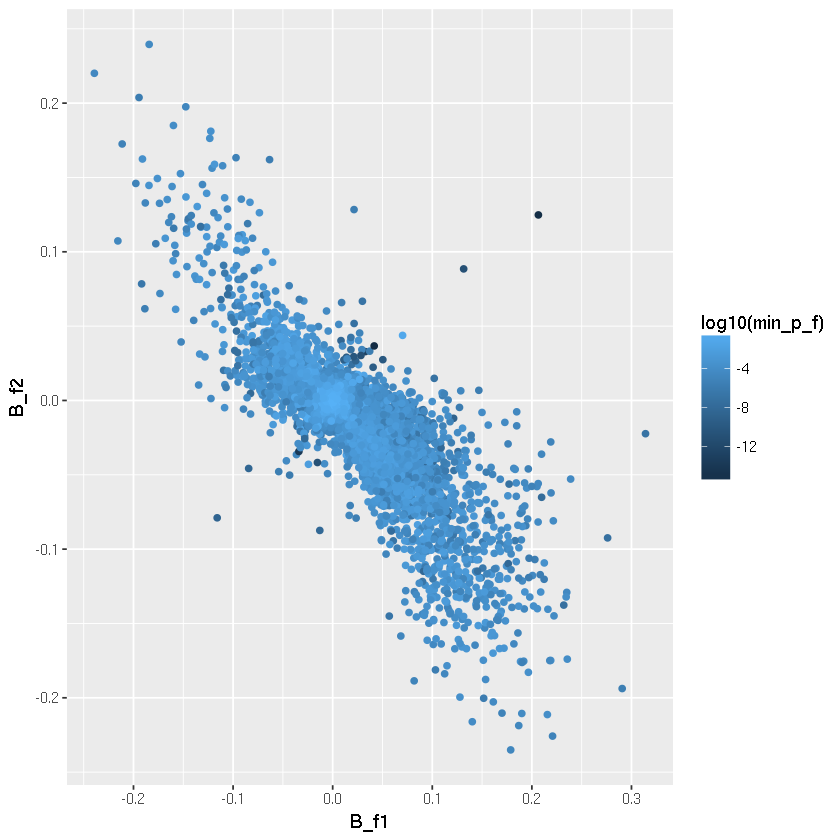

In [51]:
ggplot(d_filt %>% filter(log10(min_p_f) >-30), aes(x=B_f1,y=B_f2, color=log10(min_p_f)) ) + geom_point()


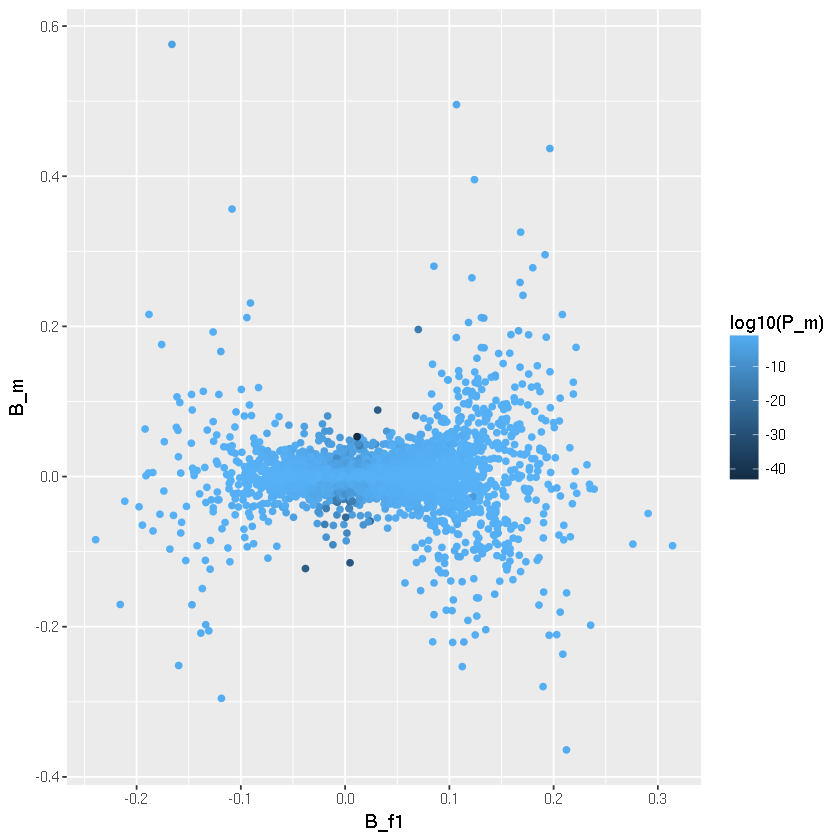

In [54]:
ggplot(d_filt %>% filter(log10(P_m) >-60), aes(x=B_f1,y=B_m, color=log10(P_m))) + geom_point()

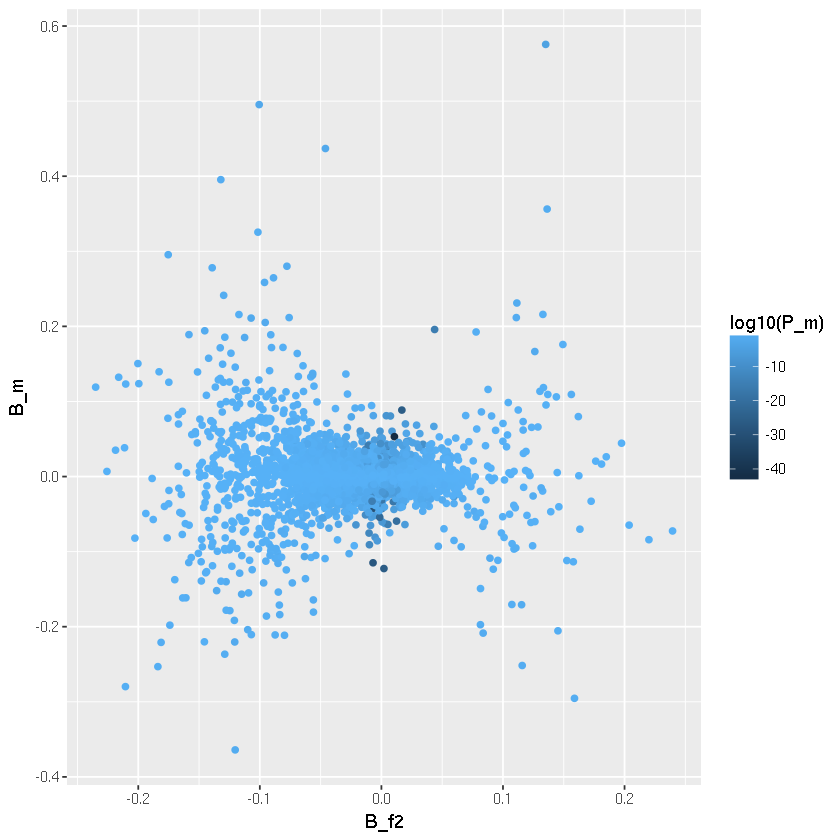

In [55]:
ggplot(d_filt %>% filter(log10(P_m) >-60), aes(x=B_f2,y=B_m, color=log10(P_m))) + geom_point()

In [56]:
d_filt %>% filter(P_f1 < 10**(-6) | P_f2 < 10**(-6)) %>% filter((B_f1*B_f2) < 0) %>% arrange(B_f1) 


SNP,B_f1,SE_f1,P_f1,B_f2,SE_f2,P_f2,B_m,SE_m,P_m,min_p_f,max_se_f
Affx-5280174,-0.1918220,0.03762480,3.44040e-07,0.07841730,0.04088320,5.51037e-02,0.063301100,0.14142600,0.6544500,3.44040e-07,0.04088320
rs758420,-0.1596450,0.03205400,6.36377e-07,0.11581900,0.03361130,5.69551e-04,-0.251662000,0.12311500,0.0409437,6.36377e-07,0.03361130
rs968733,-0.1448510,0.02806680,2.46707e-07,0.12221400,0.02875490,2.13770e-05,0.001338330,0.05837090,0.9817080,2.46707e-07,0.02875490
rs505156,-0.1325850,0.02451180,6.36753e-08,0.11700400,0.02555040,4.66990e-06,-0.014323200,0.11323600,0.8993440,6.36753e-08,0.02555040
rs776037,-0.1122350,0.02064660,5.47604e-08,0.06783330,0.01957910,5.31270e-04,0.039194100,0.02884030,0.1741480,5.47604e-08,0.02064660
rs12762472,-0.1095350,0.02185130,5.38494e-07,0.09085160,0.02263240,5.96810e-05,-0.005332450,0.07931730,0.9463990,5.38494e-07,0.02263240
rs683747,-0.1094960,0.02092800,1.68379e-07,0.02027490,0.01723080,2.39332e-01,0.035498100,0.01688320,0.0355054,1.68379e-07,0.02092800
rs12932056,-0.1083480,0.02174890,6.32196e-07,0.08563860,0.02244180,1.35695e-04,0.041039300,0.07298300,0.5739040,6.32196e-07,0.02244180
rs235636,-0.1054460,0.01899700,2.86040e-08,0.07119530,0.01938250,2.39679e-04,-0.050967000,0.06159810,0.4080050,2.86040e-08,0.01938250
rs260972,-0.1042110,0.01927460,6.45274e-08,0.07554980,0.01961880,1.17765e-04,0.020849500,0.04757920,0.6612380,6.45274e-08,0.01961880


In [24]:
d_filt %>% filter(P_f1 < 10**(-8)) %>% arrange(P_f1) 


SNP,B_f1,SE_f1,P_f1,B_f2,SE_f2,P_f2,B_m,SE_m,P_m
rs6962772,0.1228910,0.00805654,2.07321e-52,0.05958940,0.00584948,2.32531e-24,-0.02695170,0.00511842,1.39906e-07
rs17277546,0.2030660,0.01607270,1.56427e-36,0.13140100,0.01089530,1.80154e-33,-0.01514430,0.00866197,8.04021e-02
rs13222543,0.2065400,0.02521630,2.65997e-16,0.12479500,0.01672070,8.49331e-14,-0.02593710,0.01329490,5.10711e-02
rs117722415,0.1315230,0.01919840,7.43672e-12,0.08849980,0.01314690,1.68690e-11,-0.00110383,0.01066510,9.17567e-01
rs1864357,0.0503642,0.00777446,9.37454e-11,0.02743620,0.00546693,5.21461e-07,-0.00630639,0.00466860,1.76758e-01
rs544400,0.0416808,0.00648871,1.34353e-10,0.03667510,0.00442761,1.21261e-16,0.00537212,0.00370561,1.47137e-01
rs6820734,0.0405848,0.00643160,2.81082e-10,0.02233900,0.00440653,3.99532e-07,0.01897600,0.00370267,2.97991e-07
rs72920968,0.1214170,0.01993040,1.12332e-09,-0.01200140,0.01694870,4.78881e-01,-0.01623010,0.02083220,4.35931e-01
rs7329265,0.1380080,0.02308720,2.27915e-09,-0.07275550,0.02505690,3.68966e-03,0.08301110,0.08774300,3.44114e-01
rs113253118,-0.0843479,0.01425540,3.30265e-09,-0.04572970,0.00953128,1.60598e-06,-0.00962159,0.00784518,2.20037e-01


In [26]:
d_filt %>% filter(P_f2 < 10**(-8)) %>% arrange(P_f2) 


SNP,B_f1,SE_f1,P_f1,B_f2,SE_f2,P_f2,B_m,SE_m,P_m
rs17277546,0.20306600,0.01607270,1.56427e-36,0.1314010,0.01089530,1.80154e-33,-0.01514430,0.00866197,8.04021e-02
rs6962772,0.12289100,0.00805654,2.07321e-52,0.0595894,0.00584948,2.32531e-24,-0.02695170,0.00511842,1.39906e-07
rs544400,0.04168080,0.00648871,1.34353e-10,0.0366751,0.00442761,1.21261e-16,0.00537212,0.00370561,1.47137e-01
rs7596789,-0.03393030,0.00648858,1.70935e-07,-0.0343107,0.00442655,9.19187e-15,-0.00121713,0.00371556,7.43233e-01
rs13222543,0.20654000,0.02521630,2.65997e-16,0.1247950,0.01672070,8.49331e-14,-0.02593710,0.01329490,5.10711e-02
rs9433773,0.03271270,0.00649876,4.82889e-07,0.0328581,0.00443228,1.24088e-13,-0.00151495,0.00371647,6.83545e-01
rs12925699,0.02835540,0.00646125,1.14365e-05,0.0302604,0.00441896,7.53862e-12,0.01068800,0.00370903,3.95701e-03
rs4889350,-0.01530200,0.00871157,7.90063e-02,-0.0417399,0.00611660,8.90021e-12,-0.00397963,0.00524269,4.47804e-01
rs117722415,0.13152300,0.01919840,7.43672e-12,0.0884998,0.01314690,1.68690e-11,-0.00110383,0.01066510,9.17567e-01
rs4779114,0.02113400,0.00657041,1.29834e-03,0.0294840,0.00449279,5.31600e-11,-0.00388290,0.00377158,3.03240e-01


In [ ]:
d_filt %>% arrange(P_m) %>% head()